#Mutliclass Food Classification

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zipRef = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zipRef.extractall()
zipRef.close()

--2022-10-09 16:46:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   239MB/s    in 2.1s    

2022-10-09 16:46:21 (239 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}''.")

There are 2 directories and 0 images in '10_food_classes_all_data''.
There are 10 directories and 0 images in '10_food_classes_all_data/test''.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings''.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak''.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger''.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice''.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream''.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry''.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen''.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi''.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon''.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza''

In [ ]:
trainDir = "10_food_classes_all_data/train/"
testDir = "10_food_classes_all_data/test"

import pathlib as pl
dataDir = pl.Path(trainDir)

classNames = np.array(sorted([item.name for item in dataDir.glob('*')]))
print(classNames)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import matplotlib.image as mpimg
import random

def viewRandImg(targetDir, targetClass):
  targetFolder = targetDir + targetClass
  randImg = random.sample(os.listdir(targetFolder), 1)
  img = mpimg.imread(targetFolder + "/" + randImg[0])
  plt.imshow(img)
  plt.title(targetClass)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

  return img

Image shape: (384, 512, 3)


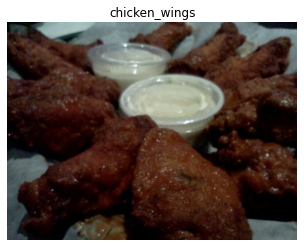

In [ ]:
img = viewRandImg(trainDir, random.choice(classNames))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

#Rescale
dataGen = ImageDataGenerator(rescale = 1./255)

trainData = dataGen.flow_from_directory(trainDir, batch_size = 32, target_size=(224,224), class_mode='categorical', seed=42)
testData = dataGen.flow_from_directory(testDir, batch_size = 32, target_size=(224,224), class_mode='categorical', seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

fvModelv1 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3), activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

fvModelv1.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# history1 = fvModelv1.fit(trainData, epochs = 5, steps_per_epoch=len(trainData), validation_data=testData, validation_steps=len(testData))

Epoch 1/5
235/235 [==============================] - 66s 226ms/step - loss: 2.1159 - accuracy: 0.2324 - val_loss: 1.9737 - val_accuracy: 0.3008
Epoch 2/5
235/235 [==============================] - 44s 189ms/step - loss: 1.9037 - accuracy: 0.3364 - val_loss: 1.8575 - val_accuracy: 0.3572
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.6483 - accuracy: 0.4423 - val_loss: 1.8412 - val_accuracy: 0.3648
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 1.2037 - accuracy: 0.6084 - val_loss: 2.1038 - val_accuracy: 0.3340
Epoch 5/5
235/235 [==============================] - 44s 186ms/step - loss: 0.6181 - accuracy: 0.8037 - val_loss: 2.8298 - val_accuracy: 0.3056


In [ ]:
fvModelv1.evaluate(testData)

79/79 [==============================] - 10s 131ms/step - loss: 2.8298 - accuracy: 0.3056


[2.8298301696777344, 0.30559998750686646]

#model doing better than guessing since the guessting rate for 10 class is 10%

In [ ]:
history1

In [ ]:
dir(history1)

In [ ]:
history1.history

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
fvModelv1.save('fvModelv1')

In [ ]:
import shutil
shutil.move('/content/fvModelv1','/content/gdrive/My Drive')

'/content/gdrive/My Drive/fvModelv1'

In [ ]:
len(history1.history['loss'])

5

In [ ]:
from bokeh.plotting import figure, show
# Our main plotting package (must have explicit import of submodules)
import bokeh.io
import bokeh.plotting

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

def plotLoss(modelHist):
  fig = figure(title="Loss Vs Epoch", x_axis_label="Epoch", y_axis_label="Loss")
  fig.line(np.array(range(1, len(modelHist.history['loss'])+1)), modelHist.history['loss'], legend_label='Training Loss', line_width=2, color='blue')
  fig.line(np.array(range(1, len(modelHist.history['loss'])+1)), modelHist.history['val_loss'], legend_label='Validation Loss', line_width=2, color='red')
  show(fig)

def plotAccuracy(modelHist):
  fig = figure(title="Accuracy Vs Epoch", x_axis_label="Epoch", y_axis_label="Accuracy")
  fig.line(np.array(range(1, len(modelHist.history['accuracy'])+1)), modelHist.history['accuracy'], legend_label='Training Accuracy', line_width=2, color='green')
  fig.line(np.array(range(1, len(modelHist.history['accuracy'])+1)), modelHist.history['val_accuracy'], legend_label='Validation Accuracy', line_width=2, color='purple')
  show(fig)




In [ ]:
# plotLoss(history1)

In [ ]:
# plotAccuracy(history1)

In [ ]:
trainDataGenAugmented = ImageDataGenerator(rescale = 1./255,
                                        rotation_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        vertical_flip=True)

trainDataAug = trainDataGenAugmented.flow_from_directory(trainDir,
                                                         target_size=(224,224),
                                                         batch_size=32,
                                                         class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# fvModelv2 = tf.keras.models.clone_model(fvModelv1)
# fvModelv2.compile(loss='categorical_crossentropy',
#                   optimizer=tf.keras.optimizers.Adam(),
#                   metrics=['accuracy'])
# history2 = fvModelv2.fit(trainDataAug, epochs= 5, steps_per_epoch=len(trainDataAug), validation_data=testData, validation_steps=len(testData))

Epoch 1/5
235/235 [==============================] - 105s 445ms/step - loss: 2.1553 - accuracy: 0.2084 - val_loss: 2.0253 - val_accuracy: 0.2716
Epoch 2/5
235/235 [==============================] - 105s 445ms/step - loss: 2.0145 - accuracy: 0.2805 - val_loss: 1.9217 - val_accuracy: 0.3100
Epoch 3/5
235/235 [==============================] - 105s 446ms/step - loss: 1.9649 - accuracy: 0.3013 - val_loss: 1.8920 - val_accuracy: 0.3276
Epoch 4/5
235/235 [==============================] - 105s 445ms/step - loss: 1.9303 - accuracy: 0.3261 - val_loss: 1.8376 - val_accuracy: 0.3612
Epoch 5/5
235/235 [==============================] - 104s 441ms/step - loss: 1.8835 - accuracy: 0.3456 - val_loss: 1.8113 - val_accuracy: 0.3672


In [ ]:
plotLoss(history2)

In [ ]:
plotAccuracy(history2)

In [ ]:
modelName = 'fvModelv2'
fvModelv2.save(f'/content/gdrive/My Drive/{modelName}')

In [ ]:
fvModelv2 = tf.keras.models.load_model('/content/gdrive/My Drive/fvModelv2')

In [ ]:
history3 = fvModelv2.fit(trainDataAug, epochs= 5, steps_per_epoch=len(trainDataAug), validation_data=testData, validation_steps=len(testData))

Epoch 1/5
235/235 [==============================] - 106s 450ms/step - loss: 1.7126 - accuracy: 0.4201 - val_loss: 1.6928 - val_accuracy: 0.4232
Epoch 2/5
235/235 [==============================] - 105s 447ms/step - loss: 1.6992 - accuracy: 0.4292 - val_loss: 1.6799 - val_accuracy: 0.4264
Epoch 3/5
235/235 [==============================] - 105s 446ms/step - loss: 1.6708 - accuracy: 0.4379 - val_loss: 1.6961 - val_accuracy: 0.4228
Epoch 4/5
235/235 [==============================] - 105s 448ms/step - loss: 1.6787 - accuracy: 0.4340 - val_loss: 1.7059 - val_accuracy: 0.4104
Epoch 5/5
235/235 [==============================] - 105s 448ms/step - loss: 1.6456 - accuracy: 0.4487 - val_loss: 1.6578 - val_accuracy: 0.4452


In [ ]:
plotLoss(history3)

In [ ]:
plotAccuracy(history3)

In [ ]:
history4 = fvModelv2.fit(trainDataAug, epochs= 20, steps_per_epoch=len(trainDataAug), validation_data=testData, validation_steps=len(testData))

Epoch 1/20
235/235 [==============================] - 108s 459ms/step - loss: 1.6253 - accuracy: 0.4516 - val_loss: 1.6364 - val_accuracy: 0.4384
Epoch 2/20
235/235 [==============================] - 105s 446ms/step - loss: 1.6121 - accuracy: 0.4677 - val_loss: 1.6696 - val_accuracy: 0.4336
Epoch 3/20
235/235 [==============================] - 105s 448ms/step - loss: 1.5924 - accuracy: 0.4693 - val_loss: 1.6318 - val_accuracy: 0.4504
Epoch 4/20
235/235 [==============================] - 106s 450ms/step - loss: 1.5948 - accuracy: 0.4688 - val_loss: 1.6180 - val_accuracy: 0.4588
Epoch 5/20
235/235 [==============================] - 105s 449ms/step - loss: 1.5795 - accuracy: 0.4676 - val_loss: 1.6445 - val_accuracy: 0.4392
Epoch 6/20
235/235 [==============================] - 106s 450ms/step - loss: 1.5780 - accuracy: 0.4776 - val_loss: 1.6177 - val_accuracy: 0.4560
Epoch 7/20
235/235 [==============================] - 106s 451ms/step - loss: 1.5529 - accuracy: 0.4869 - val_loss: 1.6384 -

In [ ]:
plotLoss(history4)

In [ ]:
plotAccuracy(history4)

In [ ]:
modelName = 'fvModelv3'
fvModelv2.save(f'/content/gdrive/My Drive/{modelName}')

In [ ]:
fvModelv3 = tf.keras.models.load_model('/content/gdrive/My Drive/fvModelv3')

In [ ]:
history5 = fvModelv3.fit(trainDataAug, epochs= 100, steps_per_epoch=len(trainDataAug), validation_data=testData, validation_steps=len(testData))

Epoch 1/100
235/235 [==============================] - 107s 456ms/step - loss: 1.4360 - accuracy: 0.5219 - val_loss: 1.5778 - val_accuracy: 0.4660
Epoch 2/100
235/235 [==============================] - 105s 448ms/step - loss: 1.4304 - accuracy: 0.5180 - val_loss: 1.5138 - val_accuracy: 0.5032
Epoch 3/100
235/235 [==============================] - 105s 448ms/step - loss: 1.4147 - accuracy: 0.5312 - val_loss: 1.6099 - val_accuracy: 0.4680
Epoch 4/100
235/235 [==============================] - 105s 449ms/step - loss: 1.4358 - accuracy: 0.5205 - val_loss: 1.5475 - val_accuracy: 0.4892
Epoch 5/100
235/235 [==============================] - 105s 448ms/step - loss: 1.4129 - accuracy: 0.5295 - val_loss: 1.5206 - val_accuracy: 0.4832
Epoch 6/100
235/235 [==============================] - 105s 447ms/step - loss: 1.4170 - accuracy: 0.5241 - val_loss: 1.5332 - val_accuracy: 0.4928
Epoch 7/100
235/235 [==============================] - 105s 447ms/step - loss: 1.3997 - accuracy: 0.5333 - val_loss: 1

In [ ]:
def plotAccuracyBA(modelHist):
  fig = figure(title="Accuracy Vs Epoch", x_axis_label="Epoch", y_axis_label="Accuracy")
  fig.line(np.array(range(1, len(modelHist.history['accuracy'])+1)), modelHist.history['accuracy'], legend_label='Training Accuracy', line_width=2, color='green')
  fig.line(np.array(range(1, len(modelHist.history['accuracy'])+1)), modelHist.history['val_accuracy'], legend_label='Validation Accuracy', line_width=2, color='purple')
  fig.line([5, 5], [5, 3],label_legend="After Fine Tuning" line_width=2, color='blue')
  show(fig)